In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [57]:
X = np.random.rand(100, 1) * 6-3 
y = 0.5* X**2 + 1.5 * X + 2+ np.random.randn(100, 1) 

In [58]:
X

array([[ 1.91628447],
       [ 0.40496989],
       [ 0.01579477],
       [ 2.73717615],
       [ 0.96683636],
       [ 1.76204215],
       [ 0.31650885],
       [ 1.97985456],
       [-1.23460348],
       [-2.14623004],
       [-0.80029126],
       [ 0.55705973],
       [ 1.1072398 ],
       [-2.70026576],
       [-0.64399599],
       [-2.5936597 ],
       [ 0.22967825],
       [-2.91500401],
       [-1.03748998],
       [ 1.93358072],
       [-0.19373549],
       [ 0.5395202 ],
       [-2.94381223],
       [-1.89629659],
       [-0.66249354],
       [ 0.04280512],
       [ 1.50587254],
       [-2.69658247],
       [ 2.40851776],
       [-2.42845358],
       [ 2.15058395],
       [ 0.03478613],
       [-0.01241901],
       [-1.47374716],
       [ 0.88788042],
       [-0.74322938],
       [-1.55609295],
       [-2.76016617],
       [-2.42702742],
       [ 0.56078806],
       [ 2.91145052],
       [-2.93981961],
       [-2.44608395],
       [ 0.2962444 ],
       [-0.779966  ],
       [-1

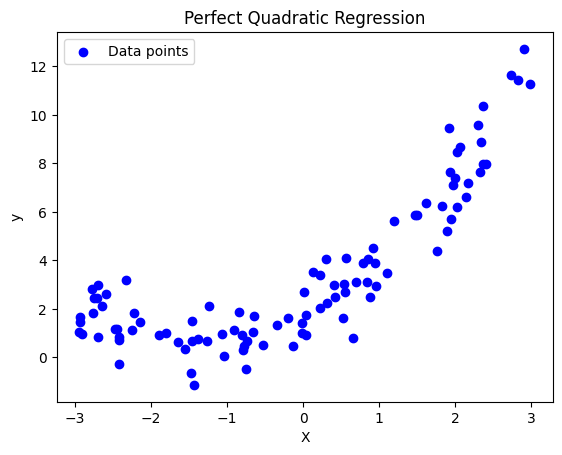

In [59]:
plt.scatter(X, y, color='blue', label='Data points')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Perfect Quadratic Regression')
plt.legend()
plt.show()

In [60]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,shuffle=False,test_size=0.25)

In [61]:
X_train

array([[ 1.91628447],
       [ 0.40496989],
       [ 0.01579477],
       [ 2.73717615],
       [ 0.96683636],
       [ 1.76204215],
       [ 0.31650885],
       [ 1.97985456],
       [-1.23460348],
       [-2.14623004],
       [-0.80029126],
       [ 0.55705973],
       [ 1.1072398 ],
       [-2.70026576],
       [-0.64399599],
       [-2.5936597 ],
       [ 0.22967825],
       [-2.91500401],
       [-1.03748998],
       [ 1.93358072],
       [-0.19373549],
       [ 0.5395202 ],
       [-2.94381223],
       [-1.89629659],
       [-0.66249354],
       [ 0.04280512],
       [ 1.50587254],
       [-2.69658247],
       [ 2.40851776],
       [-2.42845358],
       [ 2.15058395],
       [ 0.03478613],
       [-0.01241901],
       [-1.47374716],
       [ 0.88788042],
       [-0.74322938],
       [-1.55609295],
       [-2.76016617],
       [-2.42702742],
       [ 0.56078806],
       [ 2.91145052],
       [-2.93981961],
       [-2.44608395],
       [ 0.2962444 ],
       [-0.779966  ],
       [-1

In [62]:
from sklearn.linear_model import LinearRegression

regression=LinearRegression()


In [63]:
regression.fit(X_train,y_train)

LinearRegression()

In [64]:
print("Coefficient is :: ",regression.coef_)
print("Intercept  is :: ",regression.intercept_)

Coefficient is ::  [[1.28440552]]
Intercept  is ::  [3.44520105]


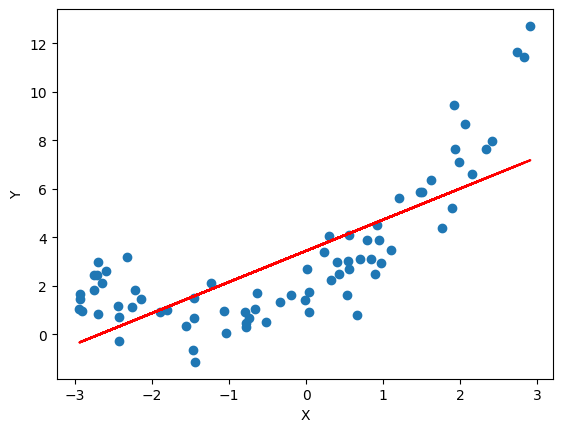

In [65]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train),color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [66]:
y_pred=regression.predict(X_test)

In [67]:
## R squared 

from sklearn.metrics import r2_score

score =r2_score(y_test,y_pred)
print(score)


0.6995444394750328


In [68]:
## Lets apply polynomial transformation
from sklearn.preprocessing import PolynomialFeatures

poly=PolynomialFeatures(degree=3,include_bias=True)

In [69]:
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

In [70]:
X_train_poly

array([[ 1.00000000e+00,  1.91628447e+00,  3.67214615e+00,
         7.03687663e+00],
       [ 1.00000000e+00,  4.04969891e-01,  1.64000613e-01,
         6.64153103e-02],
       [ 1.00000000e+00,  1.57947714e-02,  2.49474805e-04,
         3.94039751e-06],
       [ 1.00000000e+00,  2.73717615e+00,  7.49213328e+00,
         2.05072885e+01],
       [ 1.00000000e+00,  9.66836356e-01,  9.34772540e-01,
         9.03772076e-01],
       [ 1.00000000e+00,  1.76204215e+00,  3.10479255e+00,
         5.47077536e+00],
       [ 1.00000000e+00,  3.16508853e-01,  1.00177854e-01,
         3.17071778e-02],
       [ 1.00000000e+00,  1.97985456e+00,  3.91982406e+00,
         7.76068152e+00],
       [ 1.00000000e+00, -1.23460348e+00,  1.52424576e+00,
        -1.88183912e+00],
       [ 1.00000000e+00, -2.14623004e+00,  4.60630341e+00,
        -9.88618676e+00],
       [ 1.00000000e+00, -8.00291262e-01,  6.40466104e-01,
        -5.12559427e-01],
       [ 1.00000000e+00,  5.57059732e-01,  3.10315545e-01,
      

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

regression=LinearRegression()
regression.fit(X_train_poly,y_train)
y_pred=regression.predict(X_test_poly) 



score =r2_score(y_test,y_pred)
print(score)


0.9386085022863011


In [72]:
print(regression.coef_)
print(regression.intercept_)

[[0.         1.46951411 0.61045979 0.0292042 ]]
[1.72288435]


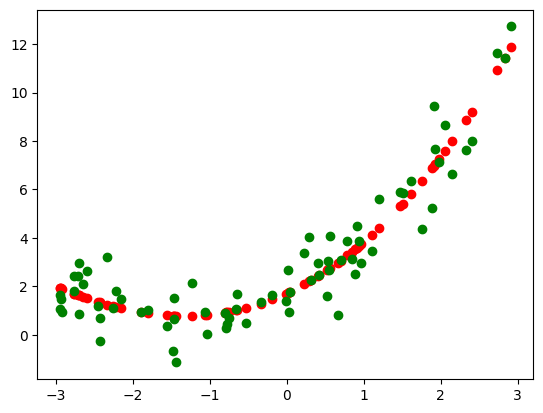

In [73]:
plt.scatter(X_train,regression.predict(X_train_poly),color='red')
plt.scatter(X_train,y_train,color='green')

In [74]:
X_new =np.linspace(-3,3,200).reshape(200,1)
X_new_poly=poly.transform(X_new)


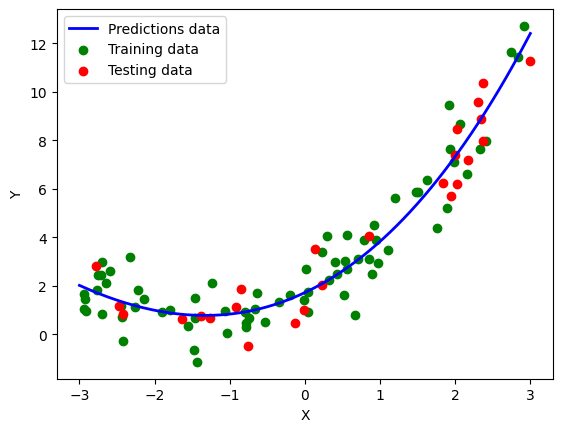

In [75]:
y_new=regression.predict(X_new_poly)
plt.plot(X_new,y_new,color='blue',linewidth=2,label='Predictions data')
plt.scatter(X_train,y_train,color='green',label='Training data')
plt.scatter(X_test,y_test,color='red',label='Testing data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()